In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


In [123]:
from src.reference_data import read_sgd

sgd_all = read_sgd('../archive/cadmium-paper/data/saccharomyces_cerevisiae_R64-1-1_20110208_no_fasta.gff')

In [248]:
from src.reference_data import read_sgd_orfs

sgd = read_sgd_orfs('../archive/cadmium-paper/data/saccharomyces_cerevisiae_R64-1-1_20110208_no_fasta.gff')

In [211]:

def get_gene_cats(sgd, chrom):
    chrom_genes = sgd[(sgd.chr == chrom)]
    chrom_watson_genes = chrom_genes[chrom_genes.strand == '+']
    
    chrom_watson_ver = chrom_watson_genes[chrom_watson_genes.orf_class == 'Verified']
    chrom_watson_unchar = chrom_watson_genes[chrom_watson_genes.orf_class == 'Uncharacterized']
    chrom_watson_dub = chrom_watson_genes[chrom_watson_genes.orf_class == 'Dubious']
    chrom_watson_rib = chrom_watson_genes[chrom_watson_genes['ontology'].str.contains('GO:0003735')]

    return chrom_genes, chrom_watson_genes, chrom_watson_ver, chrom_watson_unchar, \
            chrom_watson_dub, chrom_watson_rib

In [122]:
sgd

,name,chr,start,stop,length,strand,orf_class,ontology
orf_name,,,,,,,,
YAL069W,YAL069W,1,335,649,315,+,Dubious,"GO:0003674,GO:0005575,GO:0008150"
YAL068W-A,YAL068W-A,1,538,792,255,+,Dubious,"GO:0003674,GO:0005575,GO:0008150"
YAL068C,PAU8,1,1807,2169,363,-,Verified,"GO:0003674,GO:0005575,GO:0030437,GO:0045944"
YAL067W-A,YAL067W-A,1,2480,2707,228,+,Uncharacterized,"GO:0003674,GO:0005575,GO:0008150"
YAL067C,SEO1,1,7235,9016,1782,-,Verified,"GO:0005215,GO:0006810,GO:0016020"
...,...,...,...,...,...,...,...,...
YPR201W,ARR3,16,939922,941136,1215,+,Verified,"GO:0005886,GO:0015104,GO:0015105,GO:0015699,GO..."
YPR202W,YPR202W,16,943032,943896,865,+,Uncharacterized,"GO:0003674,GO:0005575,GO:0008150"
YPR203W,YPR203W,16,943880,944188,309,+,Uncharacterized,"GO:0003674,GO:0005575,GO:0008150"


In [155]:
def plot_chrom_dat(chrom):
    
    chrom_rows = sgd_all[sgd_all.cat == 'chromosome']
    chrom_row = chrom_rows[chrom_rows.chr == chrom]
    chrom_row = chrom_rows.loc[chrom_row.index.values[0]]
    start, end = chrom_row.start, chrom_row.stop

    print(start, end)
    (chrom_genes, chrom_watson_genes, 
     chrom_watson_ver, chrom_watson_unchar, 
     chrom_watson_dub, chrom_rib) = get_gene_cats(chrom)
    
    fig = plt.figure(figsize=(12, 6))

    def _plot_series(plt_data, y, col):
        plt_data = plt_data['start'].values
        plt.scatter(plt_data, np.zeros_like(plt_data)+y, s=20, c=col)

    def plot_subplots():
        _plot_series(chrom_watson_genes, 0, '#ddd')
        _plot_series(chrom_watson_dub, 1, 'gray')
        _plot_series(chrom_watson_unchar, 2, 'pink')
        _plot_series(chrom_watson_ver, 3, 'red')
        _plot_series(chrom_rib, 4, 'purple')
        plt.ylim(-1, 5)
    
    plt.subplot(3, 1, 1)
    plot_subplots()

    plt.subplot(3, 1, 2)
    plot_subplots()
    plt.xlim(0, 100000)
    
    plt.subplot(3, 1, 3)
    plot_subplots()
    plt.xlim(end-100000, end)

1 230218


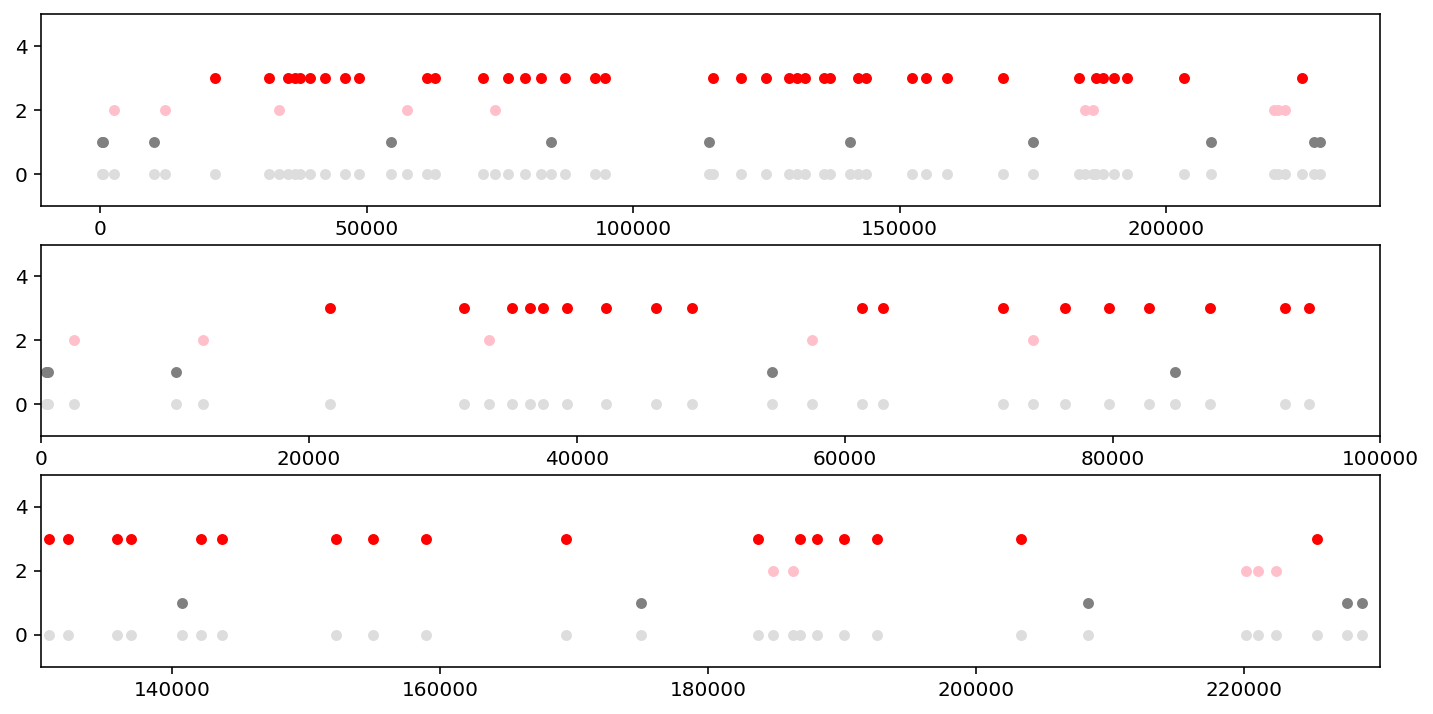

In [156]:
""" 
My hypothesis:


Genes at the start of the chromosome are less mature because they have fewer iterations of pol II running through it

Genes at the end are more mature, because the opposite.

I have ideas of maturity and youth of a gene I have previously described. Let's see how it plays out here.

Plot the distribution of dubious, verified, uncharacterized genes...

"""

plot_chrom_dat(1)

1 270161


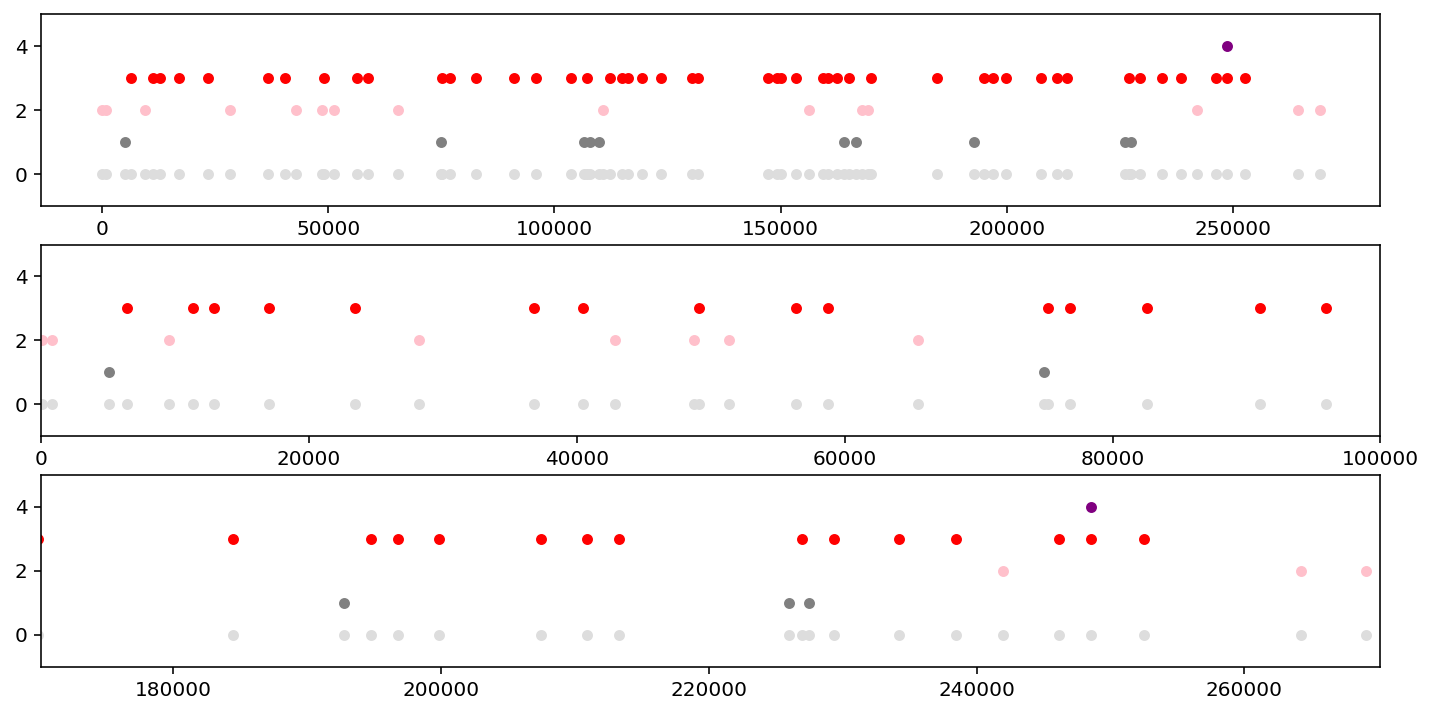

In [162]:
plot_chrom_dat(6)

1 316620


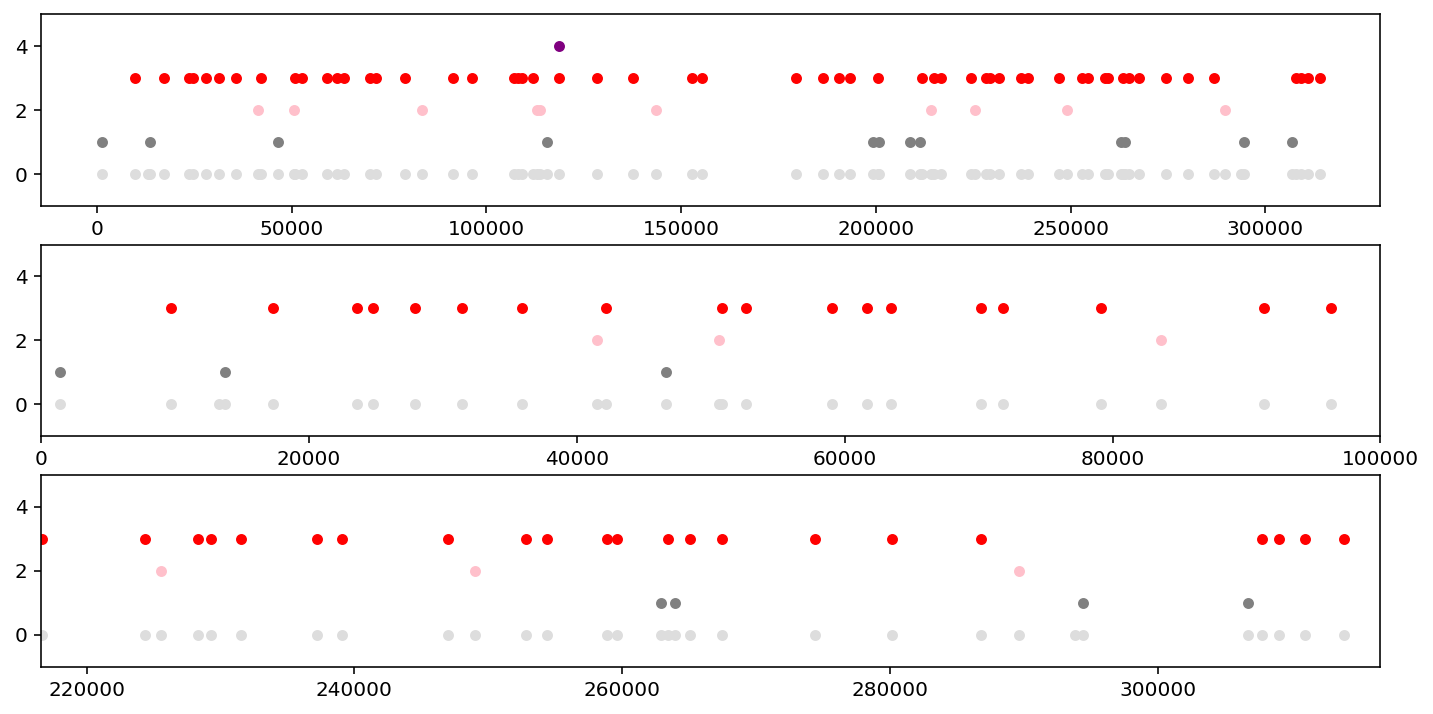

In [163]:
plot_chrom_dat(3)

1 439888


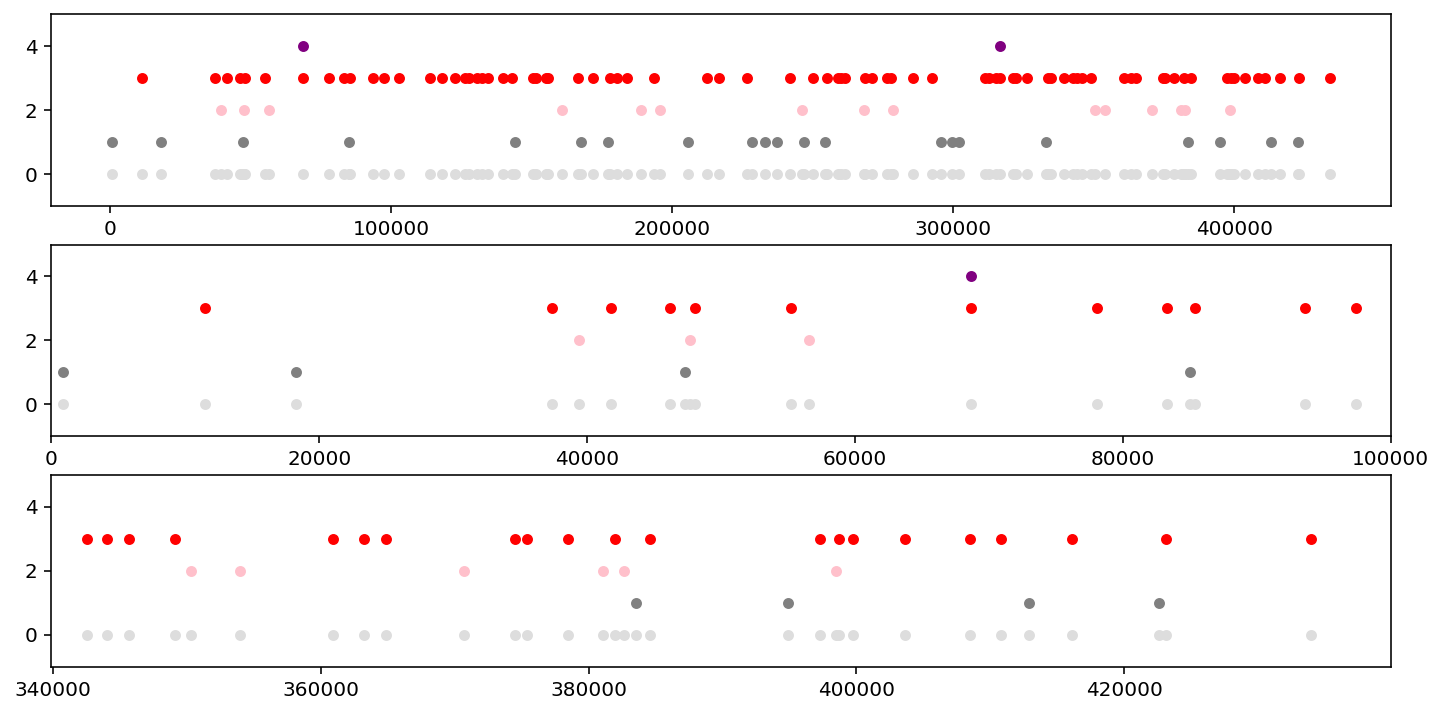

In [164]:
plot_chrom_dat(9)

1 813184


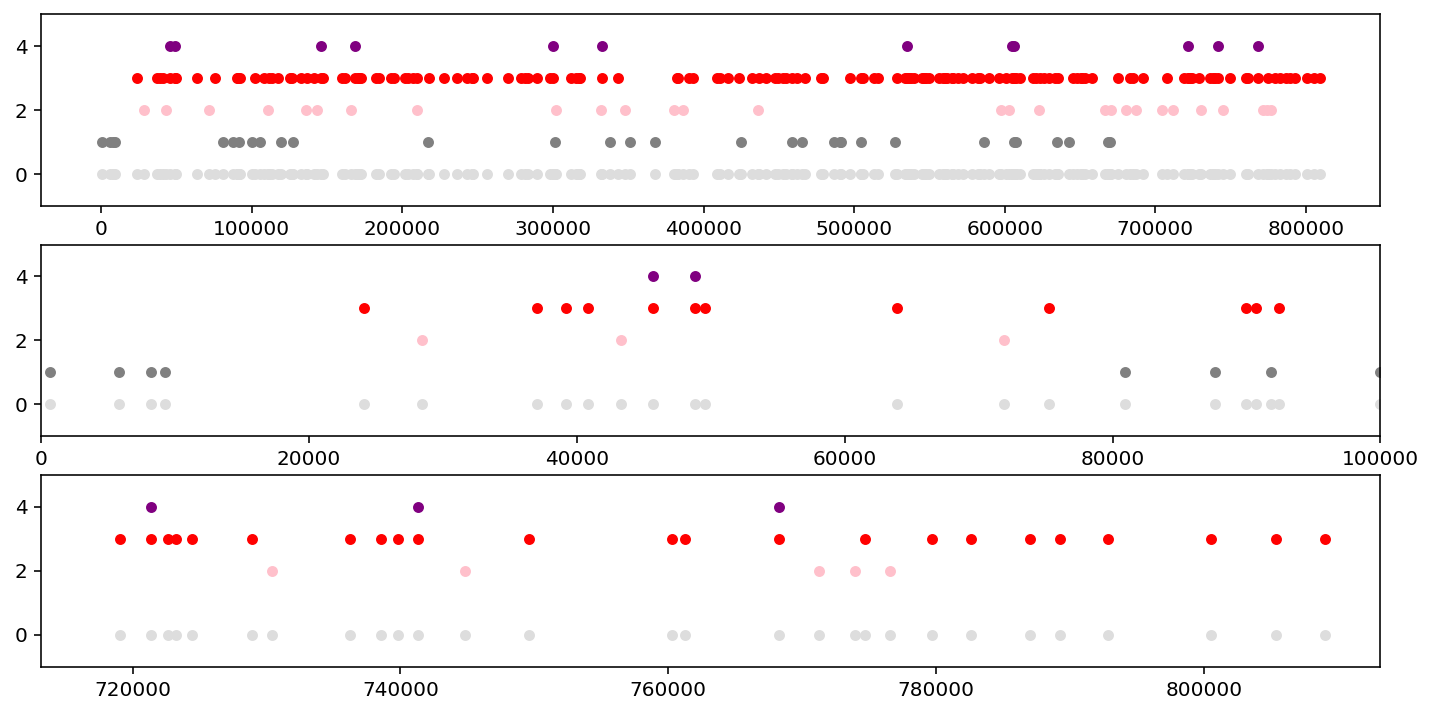

In [158]:
plot_chrom_dat(2)

1 1531933


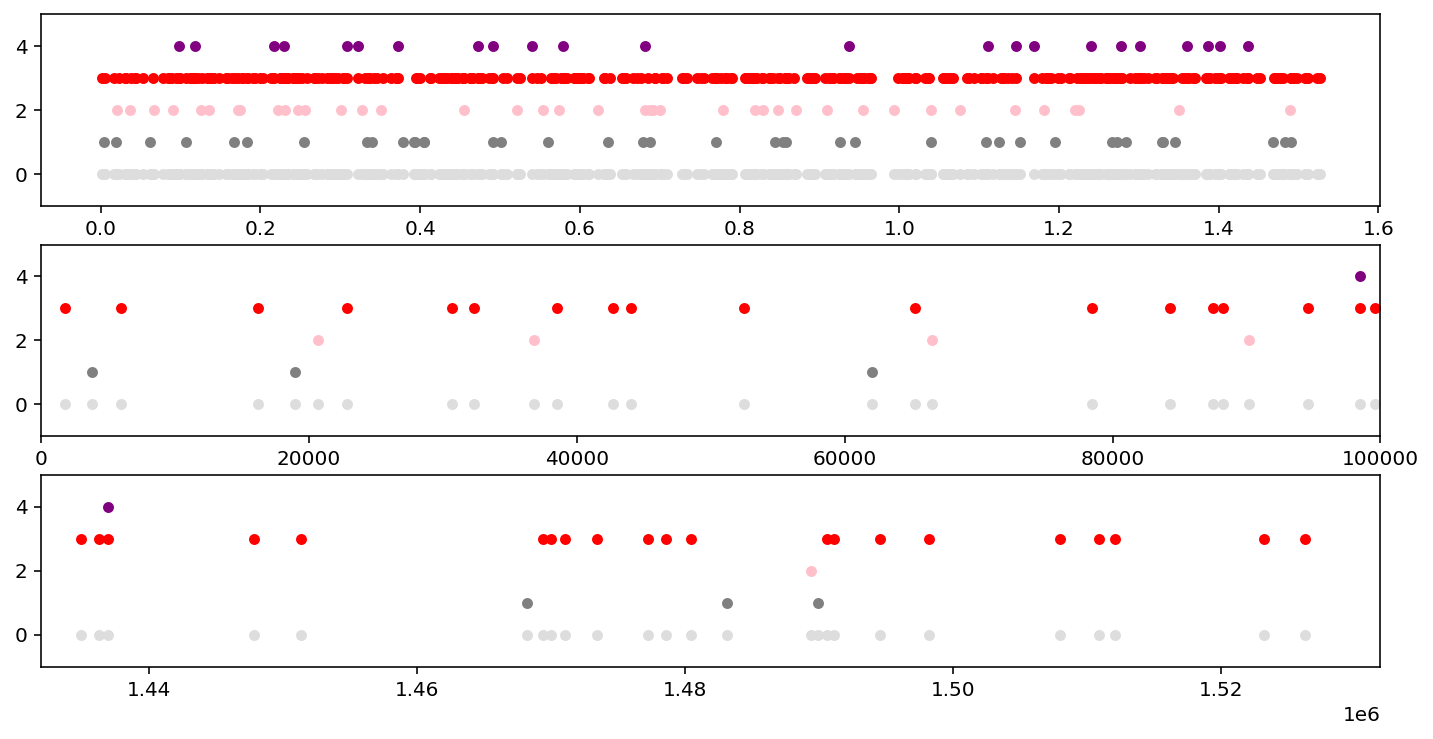

In [157]:
"""
My hypothesis doesn't hold true, but I think a different one may be appearing.

There is a density of verified genes 20000-50000. Maybe these genes are 
tightly regulated by fewer polII binding events up here.

We can see if this holds true with chromosome 4, a longer one...
"""

plot_chrom_dat(4)

In [165]:
sgd_all[sgd_all.cat == 'chromosome'].sort_values('stop')

,chr,cat,start,stop,strand,desc
16219,-1,chromosome,1,85779,.,ID=chrMito;dbxref=NCBI:NC_001224;Name=chrMito
0,1,chromosome,1,230218,.,ID=chrI;dbxref=NCBI:NC_001133;Name=chrI
4727,6,chromosome,1,270161,.,ID=chrVI;dbxref=NCBI:NC_001138;Name=chrVI
1399,3,chromosome,1,316620,.,ID=chrIII;dbxref=NCBI:NC_001135;Name=chrIII
7389,9,chromosome,1,439888,.,ID=chrIX;dbxref=NCBI:NC_001141;Name=chrIX
6590,8,chromosome,1,562643,.,ID=chrVIII;dbxref=NCBI:NC_001140;Name=chrVIII
3899,5,chromosome,1,576874,.,ID=chrV;dbxref=NCBI:NC_001137;Name=chrV
8986,11,chromosome,1,666816,.,ID=chrXI;dbxref=NCBI:NC_001143;Name=chrXI
7997,10,chromosome,1,745751,.,ID=chrX;dbxref=NCBI:NC_001142;Name=chrX
12529,14,chromosome,1,784333,.,ID=chrXIV;dbxref=NCBI:NC_001146;Name=chrXIV


In [178]:
"""A lot more heterogeneity when looking at more chromosomes, but I think there could be more ways to dilineate
things, by length maybe?


I'll need a way to plot all chromosomes in order of length, first 50000, and last 50000
"""
0


0

In [326]:

def plot_gene_locs(sgd):
                
    def _plot_genes(genes, chrom, c):
        starts = genes.start.values
        y = np.zeros_like(starts)+chrom
        plt.scatter(starts, y, s=10, c=c)
                
    def plot_chrom_seg(sgd, end=False):
        
        chrom_lens = sgd_all[sgd_all.cat == 'chromosome'].sort_values('stop').set_index('chr')
               
        for chrom in range(1, 17):
            sgd_copy = sgd.copy()
                
            if end:
                sgd_copy['start'] = sgd_copy.start.values - chrom_lens.loc[chrom].stop

            (chrom_genes, chrom_watson_genes, 
             chrom_watson_ver, chrom_watson_unchar, 
             chrom_watson_dub, chrom_rib) = get_gene_cats(sgd_copy, chrom)
            
            _plot_genes(chrom_watson_dub, chrom, '#ddd')
            _plot_genes(chrom_watson_unchar, chrom, '#57bbed')
            _plot_genes(chrom_watson_ver, chrom, '#046ea3')
            
        if end:
            plt.xlim(-60000, 10000)
            plt.xticks([-50000, 0])
            0
        else:
            plt.xlim(-10000, 60000)
            plt.xticks([0, 50000]) 

        plt.yticks([])
        plt.ylim(-5, 17)

    plt.figure(figsize=(6, 6))
    plt.subplot(1, 2, 1)
    plot_chrom_seg(sgd)

    plt.subplot(1, 2, 2)
    plot_chrom_seg(sgd, end=True)        


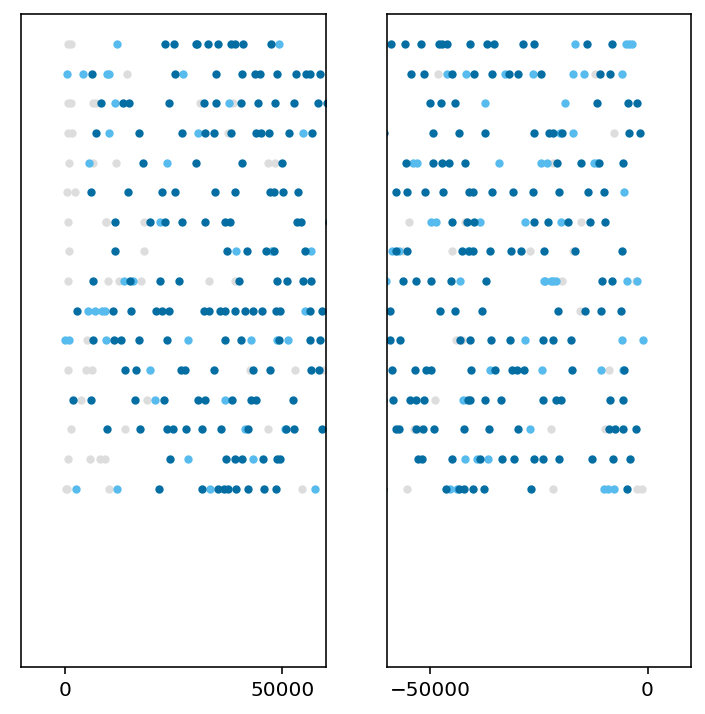

In [327]:
plot_gene_locs(sgd)

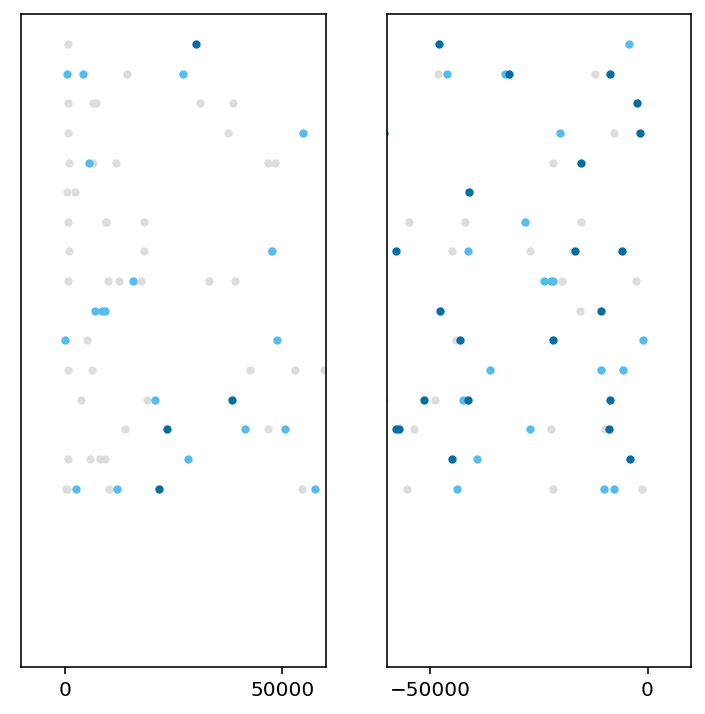

In [328]:
plot_gene_locs(sgd[sgd['length'] < 500])

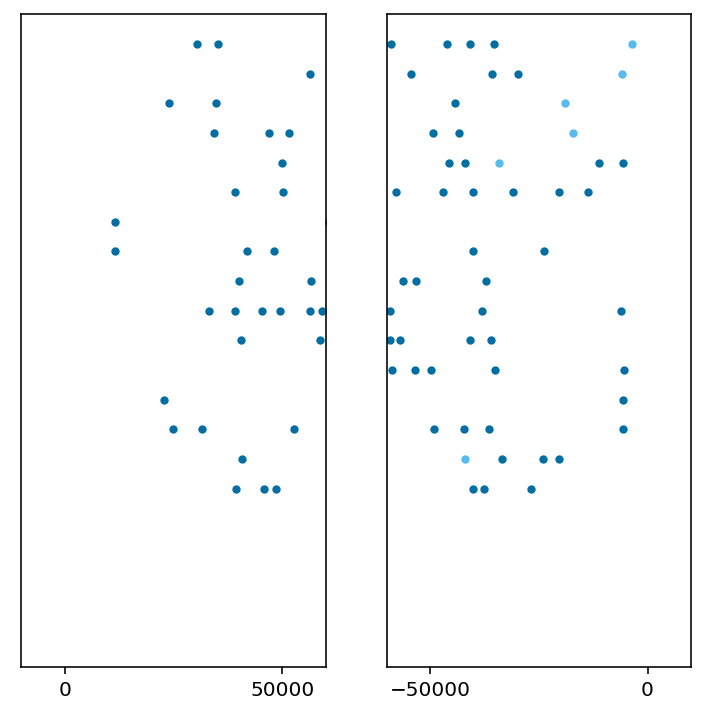

In [329]:
plot_gene_locs(sgd[sgd['length'] > 2000])

0

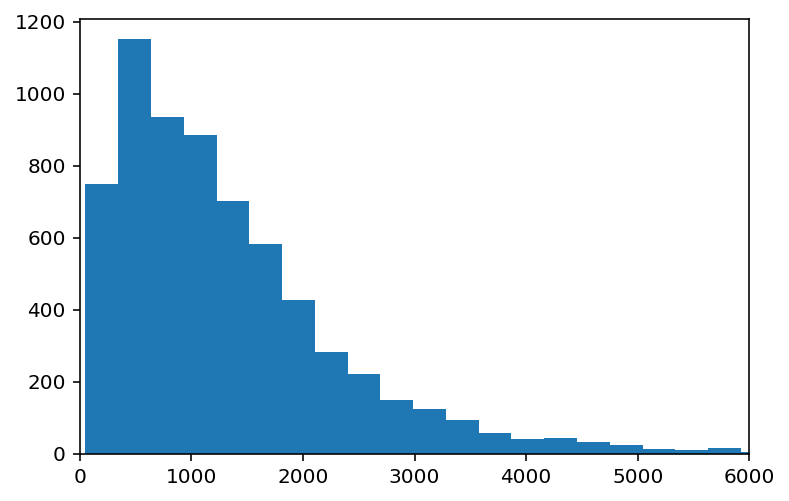

In [287]:
plt.hist(sgd['length'], bins=50)
plt.xlim(0, 6000)
0

(0.0, 80.0)

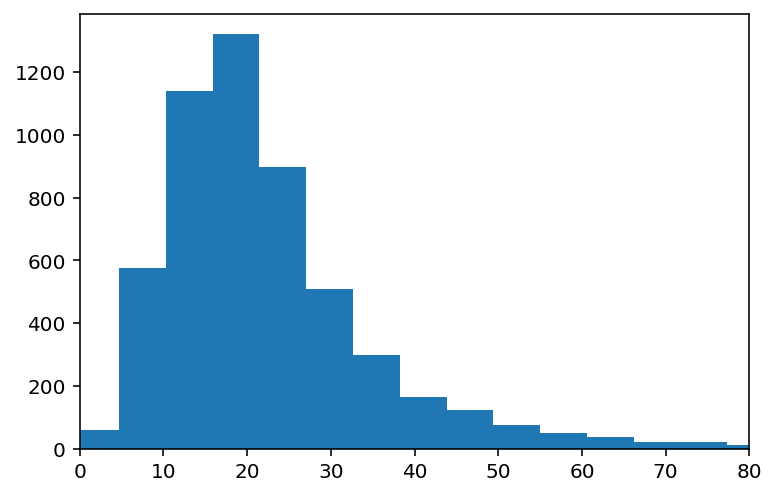

In [293]:
gene_half_life = pd.read_csv('../archive/cadmium-paper/data/half_life.csv').set_index('orf_name')
gene_half_life.head()

plt.hist(gene_half_life.half_life, bins=60)
plt.xlim(0, 80)

In [300]:
sgd_hl = sgd.join(gene_half_life[['half_life']])
sgd_hl = sgd_hl[~np.isnan(sgd_hl.half_life)]
sgd_hl

,name,chr,start,stop,length,strand,orf_class,ontology,half_life
orf_name,,,,,,,,,
YAL067C,SEO1,1,7235,9016,1782,-,Verified,"GO:0005215,GO:0006810,GO:0016020",15.000000
YAL063C-A,YAL063C-A,1,22395,22685,291,-,Uncharacterized,"GO:0003674,GO:0005575,GO:0008150",23.000000
YAL063C,FLO9,1,24000,27968,3969,-,Verified,"GO:0000128,GO:0000501,GO:0005537,GO:0009277",25.350000
YAL062W,GDH3,1,31567,32940,1374,+,Verified,"GO:0004354,GO:0005625,GO:0005634,GO:0005739,GO...",45.000000
YAL061W,BDH2,1,33448,34701,1254,+,Uncharacterized,"GO:0005634,GO:0005737,GO:0008150,GO:0016616",30.000000
...,...,...,...,...,...,...,...,...,...
YPR196W,YPR196W,16,931376,932788,1413,+,Uncharacterized,"GO:0005575,GO:0008150,GO:0043565",19.000000
YPR198W,SGE1,16,934034,935665,1632,+,Verified,"GO:0005887,GO:0015238,GO:0015893,GO:0042493",22.796667
YPR199C,ARR1,16,938148,939032,885,-,Verified,"GO:0003702,GO:0005634,GO:0005737,GO:0043565,GO...",14.653333


Text(0.5, 0.98, 'Long genes, slow decay')

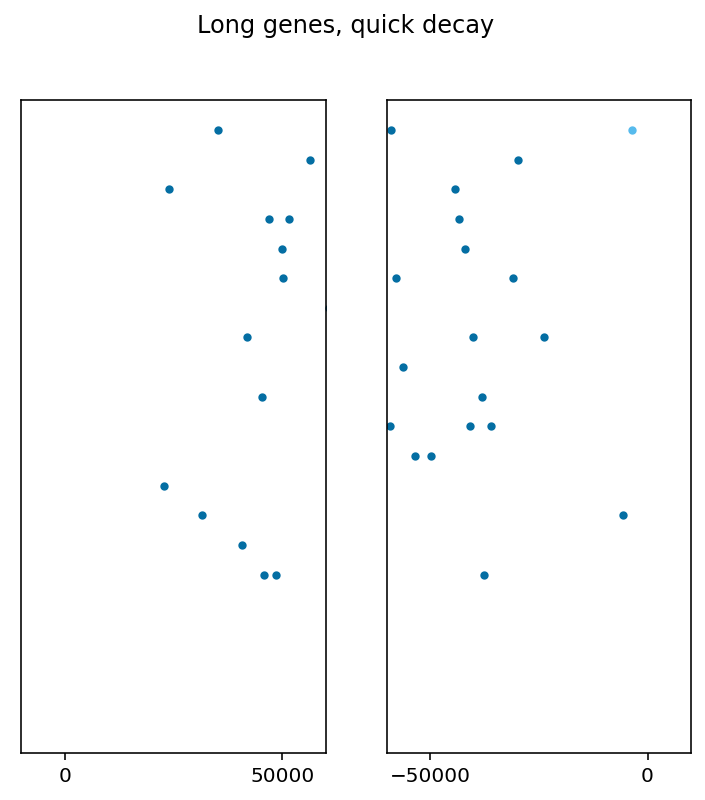

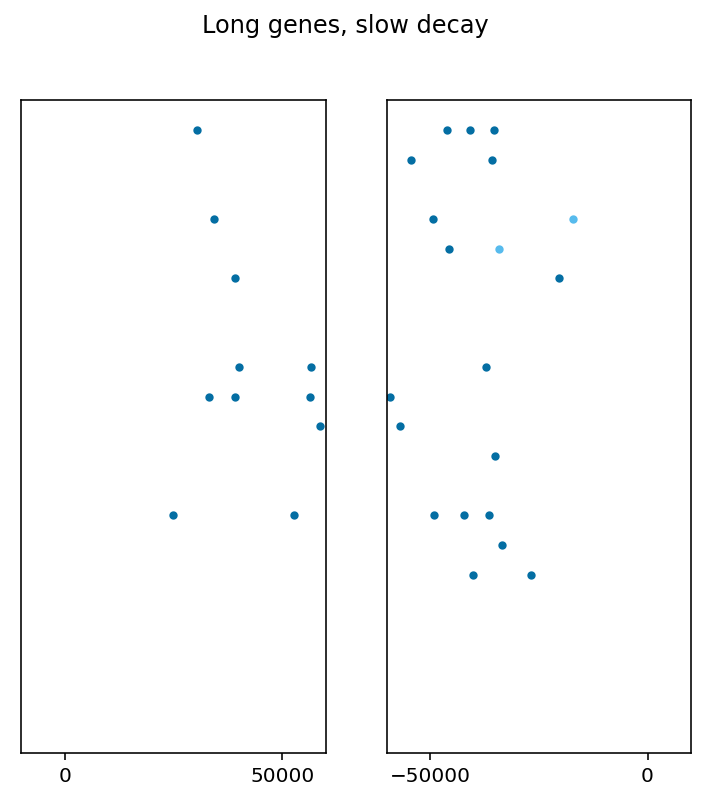

In [337]:
plot_gene_locs(sgd_hl[(sgd_hl['length'] > 2000) & (sgd_hl['half_life'] < 20)])
plt.suptitle("Long genes, quick decay")

plot_gene_locs(sgd_hl[(sgd_hl['length'] > 2000) & (sgd_hl['half_life'] > 25)])
plt.suptitle("Long genes, slow decay")

Text(0.5, 0.98, 'Short genes, slow decay')

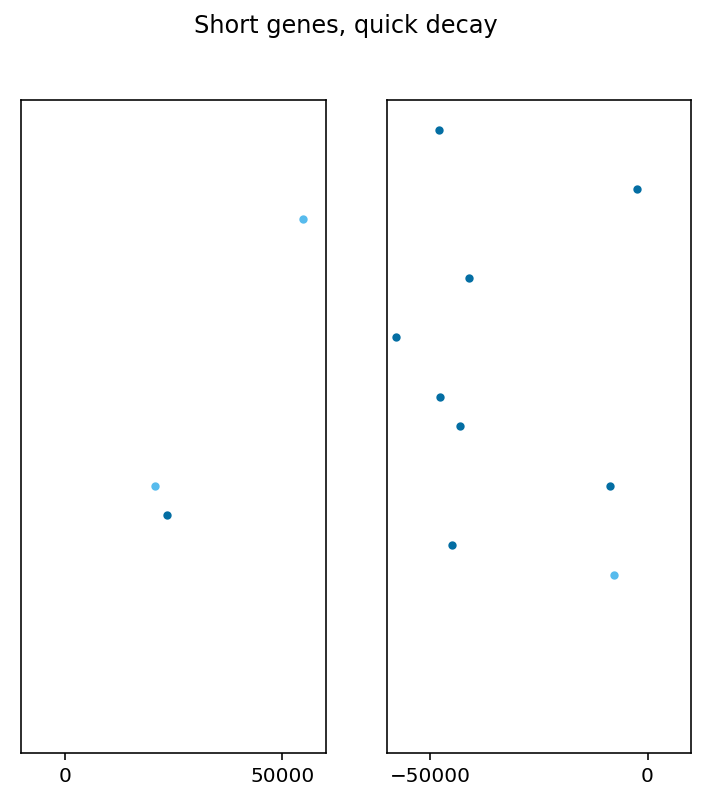

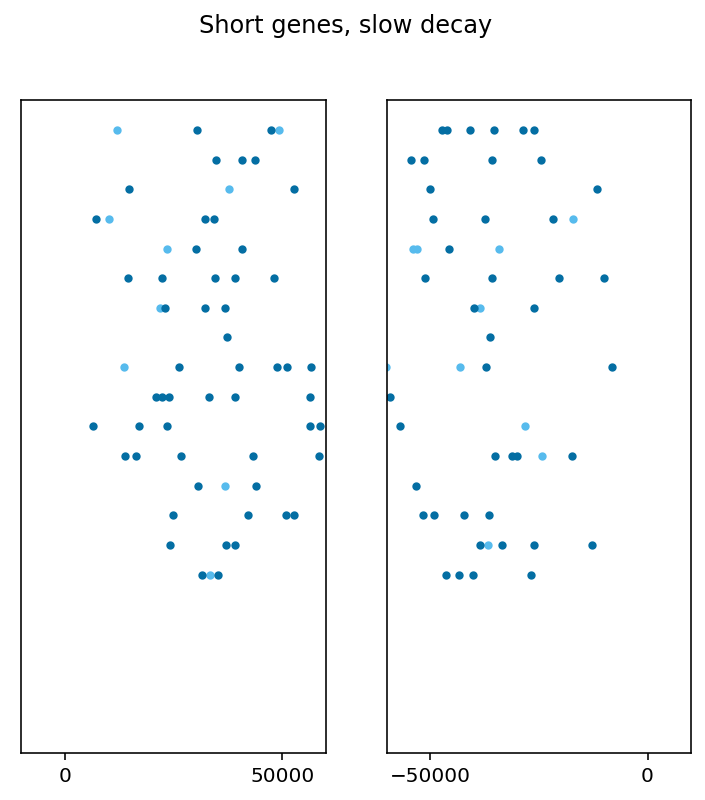

In [338]:
plot_gene_locs(sgd_hl[(sgd_hl['length'] < 500) & (sgd_hl['half_life'] < 20)])
plt.suptitle("Short genes, quick decay")

plot_gene_locs(sgd_hl[(sgd_hl['length'] > 500) & (sgd_hl['half_life'] > 25)])
plt.suptitle("Short genes, slow decay")

In [348]:
chrom_rows = sgd_all[sgd_all.cat == 'chromosome']
chrom_lens = chrom_rows.set_index('chr')[['stop']].rename(columns={'stop': 'length'})
chrom_lens.head(2)

,length
chr,
1,230218
2,813184


In [356]:
# Plot genes in the first 20,000..... decay rate vs length

sgd_hl_adj = sgd_hl.merge(chrom_lens.reset_index(), on=['chr'], suffixes=['', '_chr'])
sgd_hl_adj['start_rel_end'] = sgd_hl_adj['start'] - sgd_hl_adj['length_chr']
sgd_hl_adj

,name,chr,start,stop,length,strand,orf_class,ontology,half_life,length_chr,start_rel_end
0,SEO1,1,7235,9016,1782,-,Verified,"GO:0005215,GO:0006810,GO:0016020",15.000000,230218,-222983
1,YAL063C-A,1,22395,22685,291,-,Uncharacterized,"GO:0003674,GO:0005575,GO:0008150",23.000000,230218,-207823
2,FLO9,1,24000,27968,3969,-,Verified,"GO:0000128,GO:0000501,GO:0005537,GO:0009277",25.350000,230218,-206218
3,GDH3,1,31567,32940,1374,+,Verified,"GO:0004354,GO:0005625,GO:0005634,GO:0005739,GO...",45.000000,230218,-198651
4,BDH2,1,33448,34701,1254,+,Uncharacterized,"GO:0005634,GO:0005737,GO:0008150,GO:0016616",30.000000,230218,-196770
...,...,...,...,...,...,...,...,...,...,...,...
5376,YPR196W,16,931376,932788,1413,+,Uncharacterized,"GO:0005575,GO:0008150,GO:0043565",19.000000,948066,-16690
5377,SGE1,16,934034,935665,1632,+,Verified,"GO:0005887,GO:0015238,GO:0015893,GO:0042493",22.796667,948066,-14032
5378,ARR1,16,938148,939032,885,-,Verified,"GO:0003702,GO:0005634,GO:0005737,GO:0043565,GO...",14.653333,948066,-9918
5379,ARR3,16,939922,941136,1215,+,Verified,"GO:0005886,GO:0015104,GO:0015105,GO:0015699,GO...",6.700000,948066,-8144


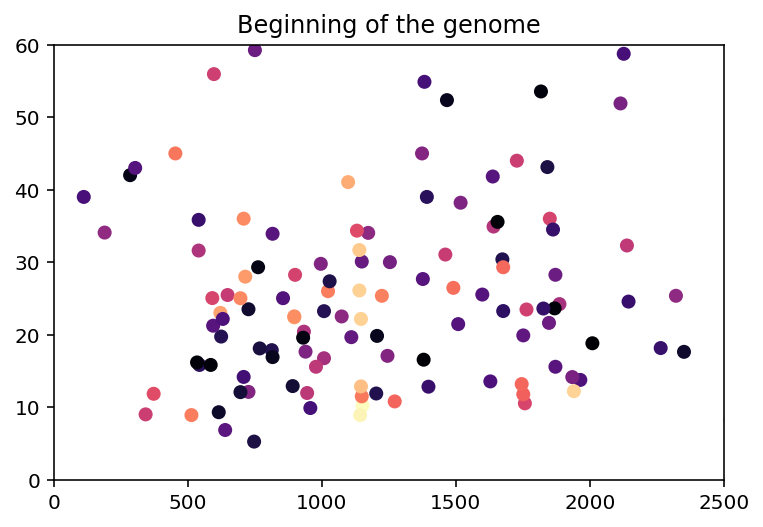

(0.0, 2500.0)

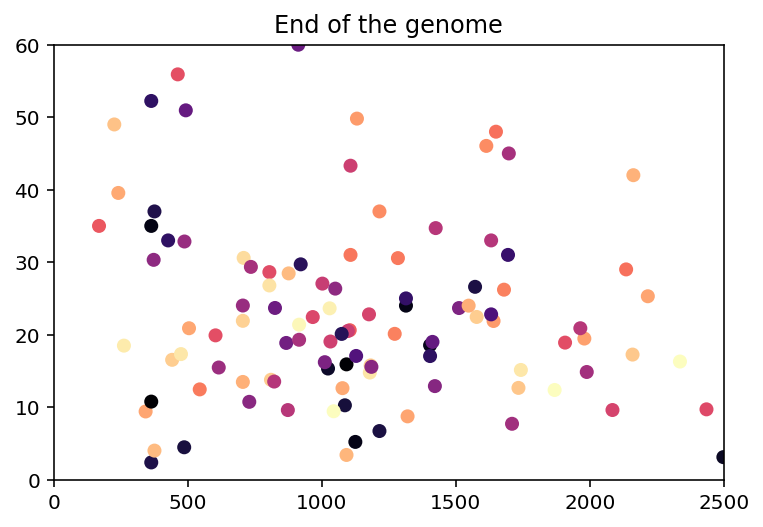

In [382]:
adj_wat = sgd_hl_adj[sgd_hl_adj.strand == '+']

first_20 = adj_wat[(adj_wat.start < 50000)]
plt.scatter(first_20['length'], first_20['half_life'], c=first_20.start, cmap='magma_r')
plt.title("Beginning of the genome")
plt.xlim(0, 2500)
plt.ylim(0, 60)
# plt.colorbar()
plt.show()

last_20 = adj_wat[(adj_wat.start_rel_end > -50000)]
plt.scatter(last_20['length'], last_20['half_life'], c=last_20.start_rel_end, cmap='magma_r')
plt.title("End of the genome")
plt.ylim(0, 60)
plt.xlim(0, 2500)
# plt.colorbar()

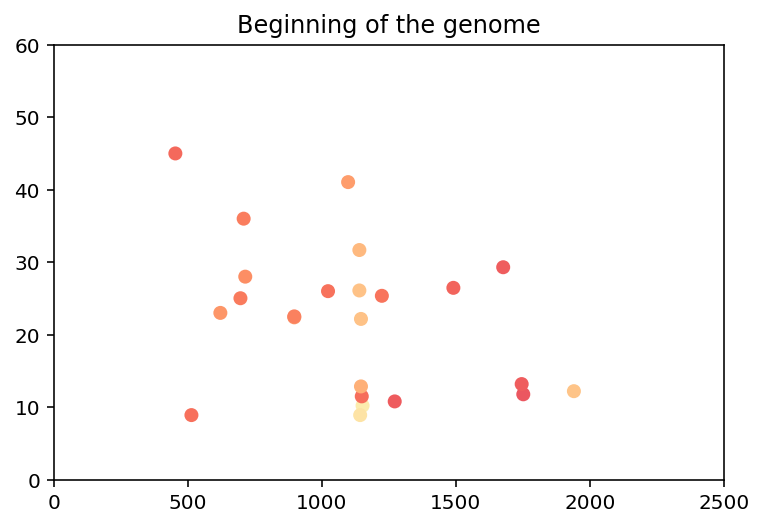

(0.0, 2500.0)

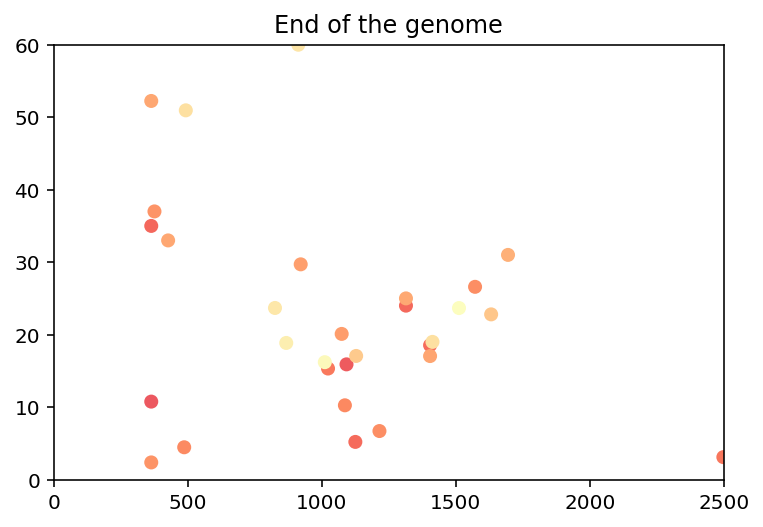

In [388]:
adj_wat = sgd_hl_adj[sgd_hl_adj.strand == '+']

first_20 = adj_wat[(adj_wat.start < 20000)]
plt.scatter(first_20['length'], first_20['half_life'], c=first_20.start, cmap='magma_r', vmax=50000, vmin=0)
plt.title("Beginning of the genome")
plt.xlim(0, 2500)
plt.ylim(0, 60)
# plt.colorbar()
plt.show()

last_20 = adj_wat[(adj_wat.start_rel_end > -20000)]
plt.scatter(last_20['length'], last_20['half_life'], c=last_20.start_rel_end, cmap='magma_r', vmin=-20000, vmax=30000)
plt.title("End of the genome")
plt.ylim(0, 60)
plt.xlim(0, 2500)
